<a href="https://colab.research.google.com/github/Teegee2000/cardiovascular-disease-predictions-leveraging-supervised-and-ensemble-machine-learning-models/blob/main/cardiovascular_disease_(mendeley_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd ## it allows loading of dataset
import numpy as np ## incase i need to work with array
import matplotlib.pyplot as plt ## for visualization
import seaborn as sns ## for visualization ## built from matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## for the primary data from mendeley
df_file_path='/content/drive/MyDrive/Cardiovascular_Disease_Dataset.csv'

df=pd.read_csv(df_file_path)## loading the dataset

In [4]:
df.head(5)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
df.shape

(1000, 14)

In [6]:
 df.describe()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [7]:
df.isna().sum() # finding any missing value

,0
patientid,0
age,0
gender,0
chestpain,0
restingBP,0
serumcholestrol,0
fastingbloodsugar,0
restingrelectro,0
maxheartrate,0
exerciseangia,0


Visualization

In [8]:
age_count=df['age'].value_counts()
print(age_count)

age
20    28
58    23
24    22
76    22
46    21
      ..
65    11
68    11
41    11
60    11
49    10
Name: count, Length: 61, dtype: int64


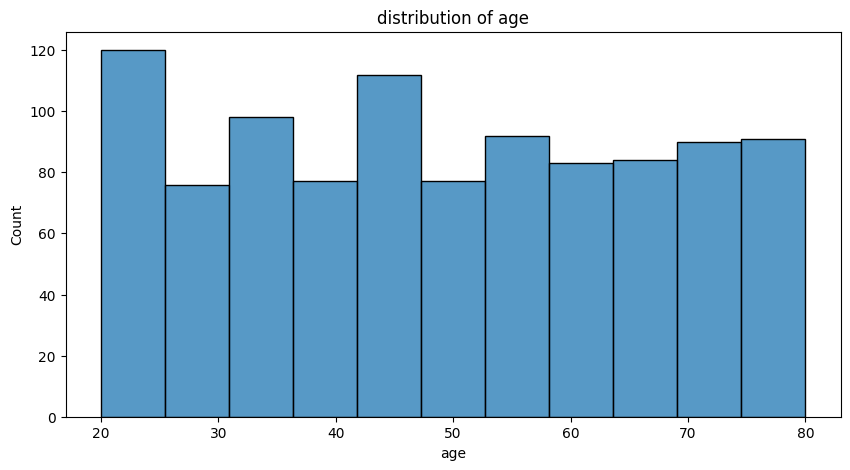

In [9]:
# distribution of age
plt.figure(figsize=(10,5))
sns.histplot(df['age'])
plt.title('distribution of age')
plt.show()

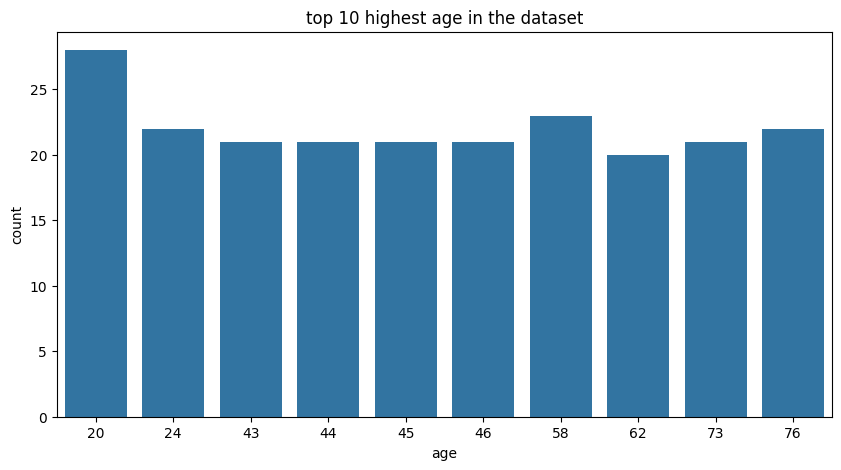

In [10]:
## top 10 highest age in the dataset
plt.figure(figsize=(10,5))
sns.barplot(x=df['age'].value_counts()[:10].index,y=df['age'].value_counts()[:10].values)
plt.title('top 10 highest age in the dataset')
plt.xlabel('age')
plt.ylabel('count')
plt.show()

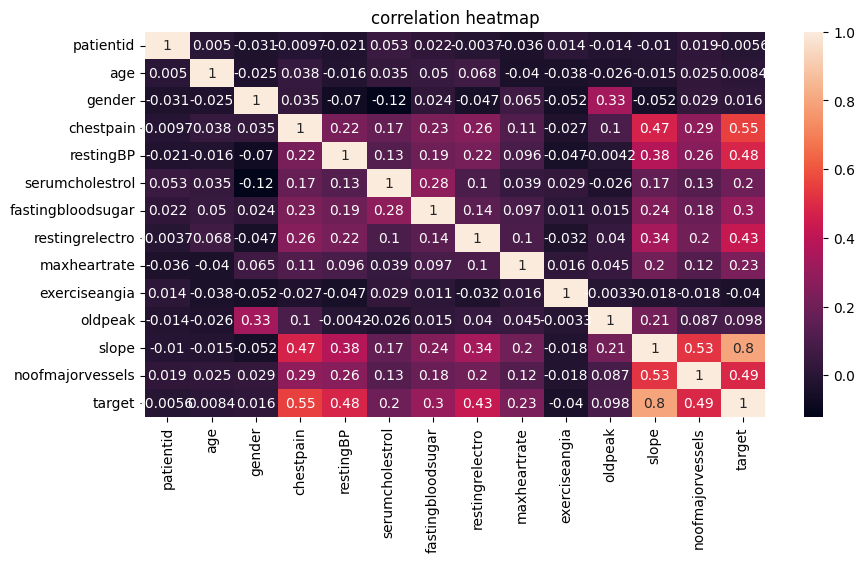

In [11]:
## correlation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation heatmap')
plt.show()

In [12]:
## checking chest pain columns
chest_pain_count=df['chestpain'].value_counts()
print(chest_pain_count)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


/tmp/ipython-input-13-1178697985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['chestpain'].value_counts().index,y=df['chestpain'].value_counts().values,palette=colors)


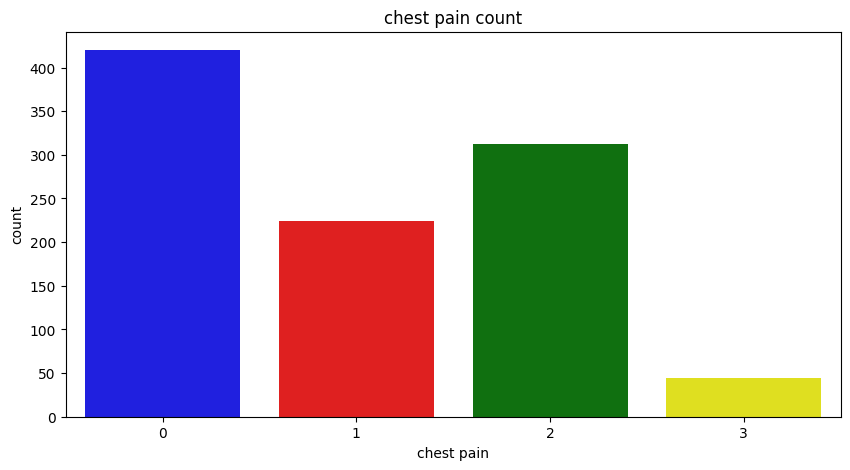

In [13]:
plt.figure(figsize=(10,5))
colors=['blue','red','green','yellow']
sns.barplot(x=df['chestpain'].value_counts().index,y=df['chestpain'].value_counts().values,palette=colors)
plt.title('chest pain count')
plt.xlabel('chest pain')
plt.ylabel('count')
plt.show()

In [14]:
from __future__ import generator_stop
## count of male and female
generator_stop=df['gender'].value_counts()
print("\n total number of male and female")
print(f'male:{generator_stop[1]}')
print(f'female:{generator_stop[0]}')


 total number of male and female
male:765
female:235


/tmp/ipython-input-15-3699673831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette=colors)


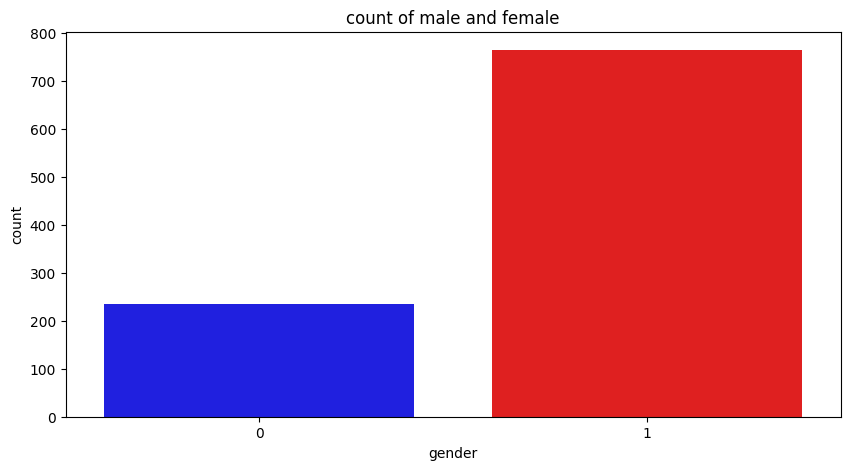

In [15]:
plt.figure(figsize=(10,5))
colors=['blue','red']
sns.barplot(x=df['gender'].value_counts().index,y=df['gender'].value_counts().values,palette=colors)
plt.title('count of male and female')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

target
1    580
0    420
Name: count, dtype: int64


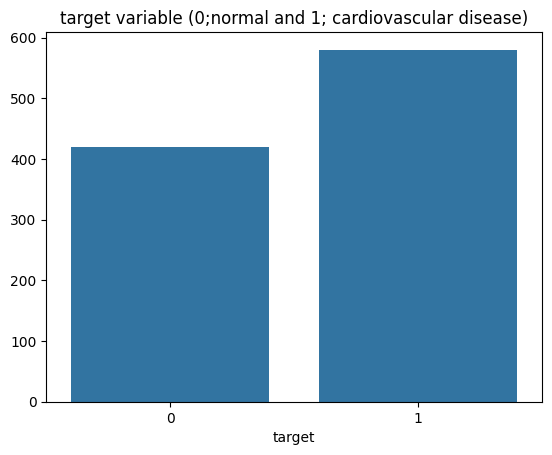

In [16]:
## target variable
target_count=df['target'].value_counts()
sns.barplot(x=df['target'].value_counts().index,y=df['target'].value_counts().values)
plt.title('target variable (0;normal and 1; cardiovascular disease)')
print(target_count)


## Data preprocessing

In [17]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [18]:
X= df.drop(columns=['target'])
y=df['target']

In [19]:
X

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2


In [20]:
y

,target
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


## splitting dataset into train (80%) and test (20%)
giving majority of the percentage to the train value so the model can train effectively on the dataset.

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

Supervised Machine learning models

1. Support vector machine
2. KNearest Neighbor
3. Naive Bayes
4. Logistic regression

In [22]:
svm= SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
log = LogisticRegression()

In [23]:
knn = knn.fit(X_train, y_train)
nb = nb.fit(X_train, y_train)
log = log.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
KNN_pred = knn.predict(X_test)
NB_pred = nb.predict(X_test)
LOG_pred = log.predict(X_test)

In [25]:
print (KNN_pred)

print ('==================================')

print (NB_pred)

print ('==================================')

print (LOG_pred)

[0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1
 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1]
[1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1]
[1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0

Supervised Machine learning Accuracy

In [26]:
print (f'KNN accuracy: {accuracy_score(y_test, KNN_pred)}')
print (f'NB accuracy: {accuracy_score(y_test, NB_pred)}')
print (f'LOG accuracy: {accuracy_score(y_test, LOG_pred)}')

KNN accuracy: 0.515
NB accuracy: 0.81
LOG accuracy: 0.675


In [27]:
print(y_train.value_counts())

target
1    463
0    337
Name: count, dtype: int64


In [28]:
model = SVC(class_weight='balanced')
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
model.fit(X_resampled, y_resampled)
SVC_pred = model.predict(X_test)
print (f'SVC accuracy: {accuracy_score(y_test, SVC_pred)}')

SVC accuracy: 0.52


Model Evaluation

Classification Report for SVC model:
               precision    recall  f1-score   support

           0       0.44      0.59      0.51        83
           1       0.62      0.47      0.53       117

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.52       200
weighted avg       0.54      0.52      0.52       200

Confusion Matrix for SVC model:
 [[49 34]
 [62 55]]


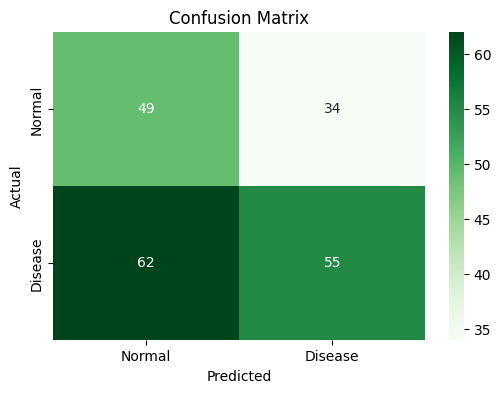

In [29]:
print("Classification Report for SVC model:\n", classification_report(y_test, SVC_pred))
conf_matrix = confusion_matrix(y_test, SVC_pred)
print("Confusion Matrix for SVC model:\n", conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Disease'], yticklabels=['Normal', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

classification report of KNN:
               precision    recall  f1-score   support

           0       0.39      0.29      0.33        83
           1       0.57      0.68      0.62       117

    accuracy                           0.52       200
   macro avg       0.48      0.48      0.48       200
weighted avg       0.50      0.52      0.50       200

[[24 59]
 [38 79]]


Text(0.5, 1.0, 'confusion matrix of KNN')

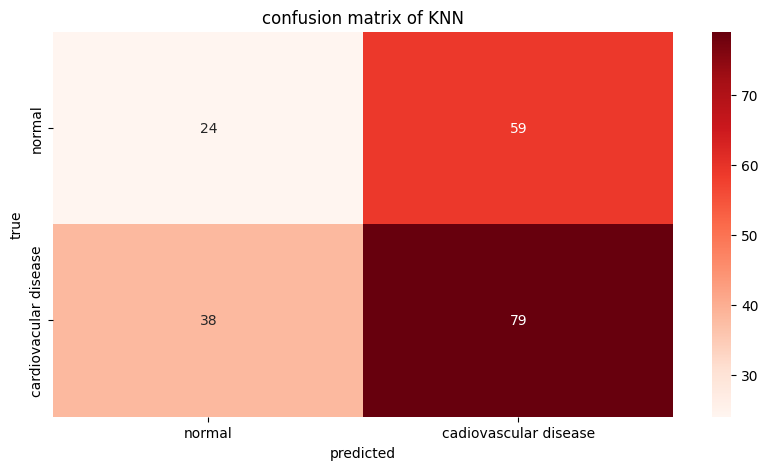

In [30]:
print (f'classification report of KNN:\n {classification_report(y_test, KNN_pred)}')
con_matrix = confusion_matrix(y_test, KNN_pred)
print (con_matrix)

#plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Reds',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of KNN')

classification report of NB:
               precision    recall  f1-score   support

           0       0.84      0.67      0.75        83
           1       0.80      0.91      0.85       117

    accuracy                           0.81       200
   macro avg       0.82      0.79      0.80       200
weighted avg       0.81      0.81      0.81       200

[[ 56  27]
 [ 11 106]]


Text(0.5, 1.0, 'confusion matrix of NB')

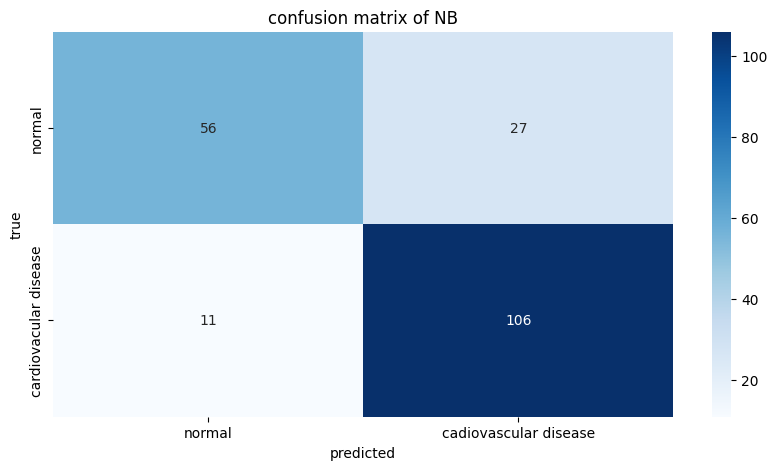

In [31]:
print (f'classification report of NB:\n {classification_report(y_test, NB_pred)}')
con_matrix = confusion_matrix(y_test, NB_pred)
print (con_matrix)

##plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='Blues',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of NB')

classification report of LOG:
               precision    recall  f1-score   support

           0       0.69      0.40      0.50        83
           1       0.67      0.87      0.76       117

    accuracy                           0.68       200
   macro avg       0.68      0.63      0.63       200
weighted avg       0.68      0.68      0.65       200

[[ 33  50]
 [ 15 102]]


Text(0.5, 1.0, 'confusion matrix of LOG')

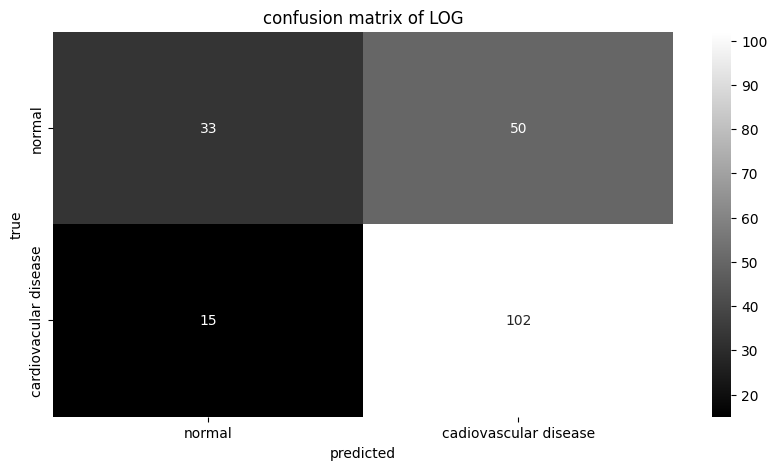

In [32]:
print(f'classification report of LOG:\n {classification_report(y_test, LOG_pred)}')
con_matrix=con_matrix = confusion_matrix(y_test, LOG_pred)
print (con_matrix)

##plot confusion graph
plt.figure(figsize=(10,5))
sns.heatmap(con_matrix, annot=True, fmt='d',cmap='grey',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of LOG')

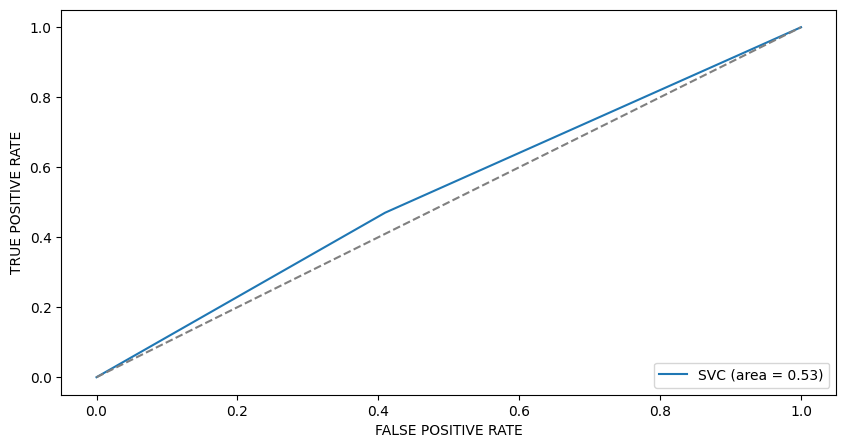

In [33]:
roc_auc = roc_auc_score(y_test, SVC_pred)
fpr, tpr, _=roc_curve(y_test, SVC_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='gray')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

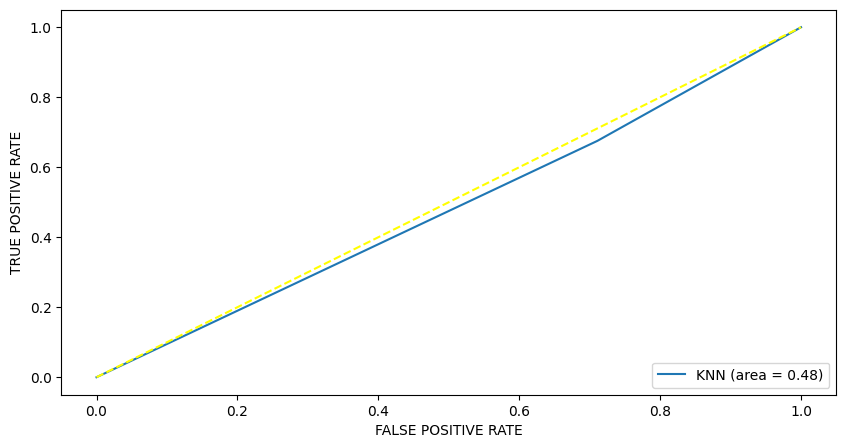

In [34]:
roc_auc = roc_auc_score(y_test, KNN_pred)
fpr, tpr, _=roc_curve(y_test, KNN_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Yellow')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

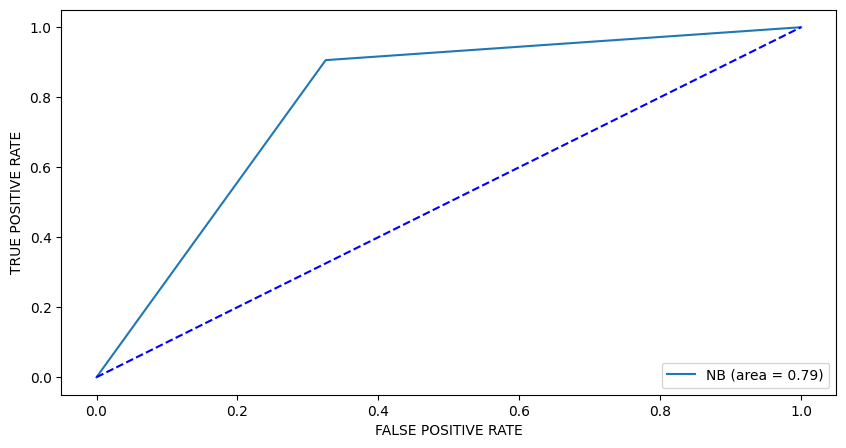

In [35]:
roc_auc = roc_auc_score(y_test, NB_pred)
fpr, tpr, _=roc_curve(y_test, NB_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Blue')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

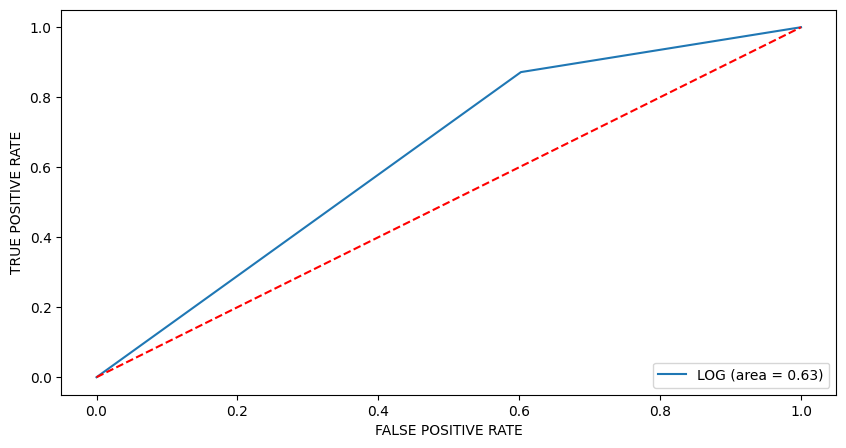

In [36]:
roc_auc = roc_auc_score(y_test, LOG_pred)
fpr, tpr, _=roc_curve(y_test, LOG_pred)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, label='LOG (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='Red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend(loc=4)
plt.show()

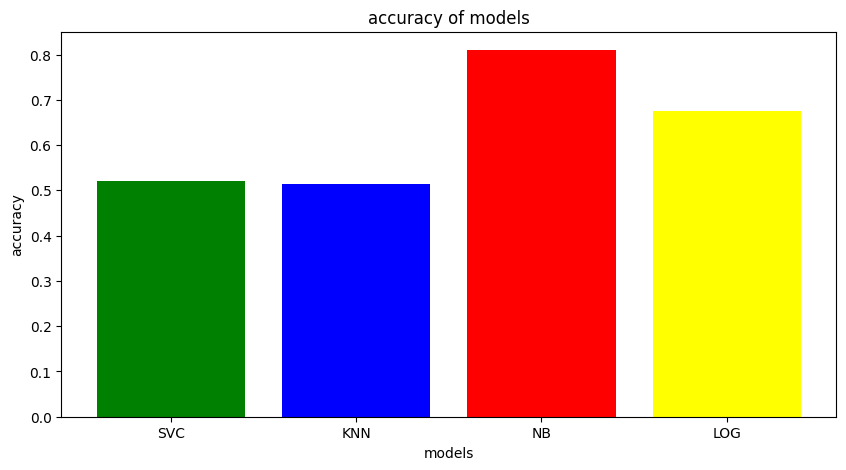

In [37]:
models=['SVC','KNN','NB','LOG']
colors=['green','blue','red','yellow']
accuracy=[accuracy_score(y_test, SVC_pred),accuracy_score(y_test, KNN_pred),accuracy_score(y_test, NB_pred),accuracy_score(y_test, LOG_pred)]
plt.figure(figsize=(10,5))
plt.bar(models,accuracy,color=colors)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy of models')
plt.show()

Ensemble Model

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)

In [40]:
from sklearn.ensemble import BaggingClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
base_classifier=DecisionTreeClassifier()
bc= BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bc.fit(X_train,y_train)
y_pred_bc=bc.predict(X_test)

In [43]:
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()

## creating list classifiers and a meta classifier
stacking = StackingClassifier(classifiers=[clf1,clf2], meta_classifier=clf2)
stacking.fit(X_train,y_train)
y_pred_stacking=stacking.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

classification report for gradient boosting
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.98      0.97      0.98       117

    accuracy                           0.97       200
   macro avg       0.97      0.98      0.97       200
weighted avg       0.98      0.97      0.98       200

[[ 81   2]
 [  3 114]]


Text(0.5, 1.0, 'confusion matrix of gradient boosting')

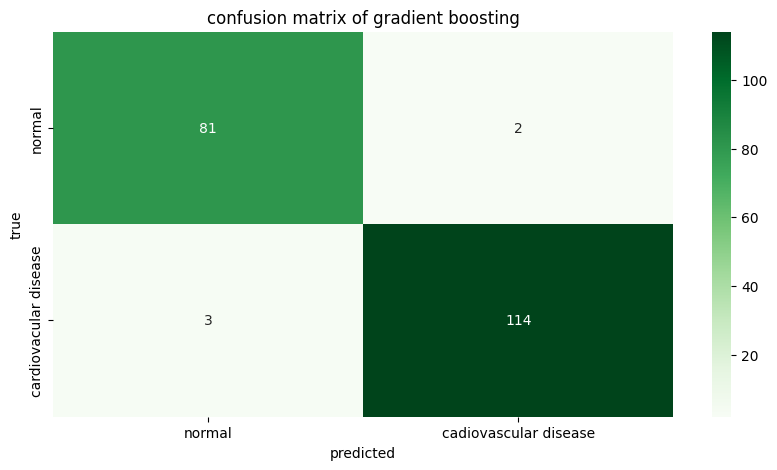

In [45]:
print ('classification report for gradient boosting\n',classification_report(y_test, y_pred_gbc))
conf_matrix = confusion_matrix(y_test, y_pred_gbc)
print (conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Greens',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of gradient boosting')

classification report for bagging
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.96      0.97       200

[[ 80   3]
 [  4 113]]


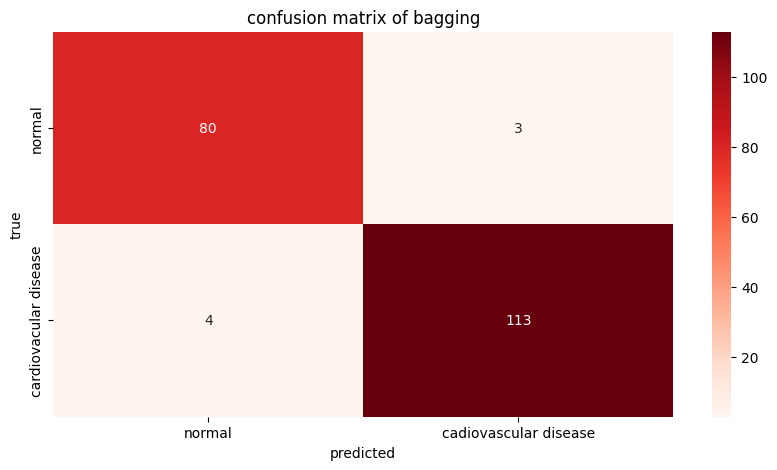

In [46]:
print ('classification report for bagging\n',classification_report(y_test, y_pred_bc))
conf_matrix = confusion_matrix(y_test, y_pred_bc)
print (conf_matrix)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Reds',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('confusion matrix of bagging')
plt.show()

classification report for stacking
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        83
           1       0.99      0.99      0.99       117

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



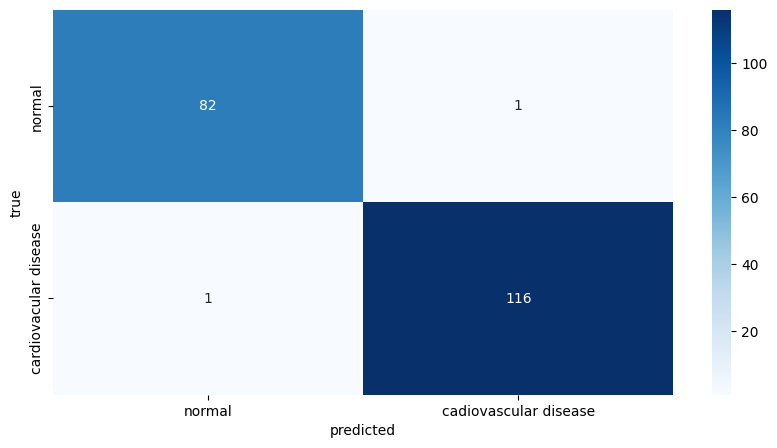

In [47]:
print ('classification report for stacking\n',classification_report(y_test, y_pred_stacking))
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(10,5))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues',xticklabels=['normal','cadiovascular disease'], yticklabels=['normal','cardiovacular disease'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.show()

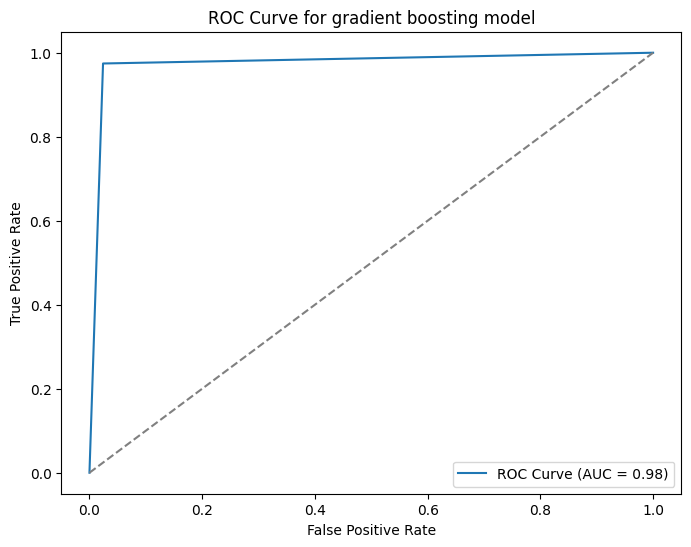

In [48]:
# ROC-AUC curve
roc_auc = roc_auc_score(y_test,y_pred_gbc)
fpr, tpr, _ = roc_curve(y_test, y_pred_gbc)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for gradient boosting model')
plt.legend()
plt.show()

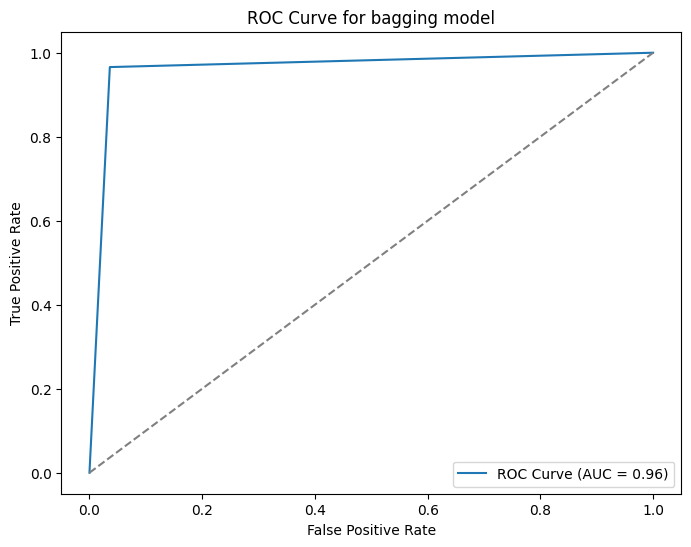

In [49]:
roc_auc = roc_auc_score(y_test,y_pred_bc)
fpr, tpr, _ = roc_curve(y_test, y_pred_bc)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for bagging model')
plt.legend()
plt.show()

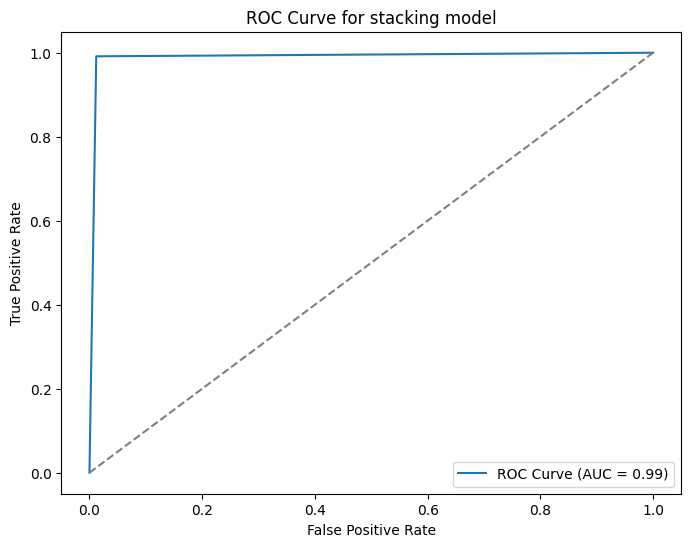

In [50]:
roc_auc = roc_auc_score(y_test,y_pred_stacking)
fpr, tpr, _ = roc_curve(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for stacking model')
plt.legend()
plt.show()

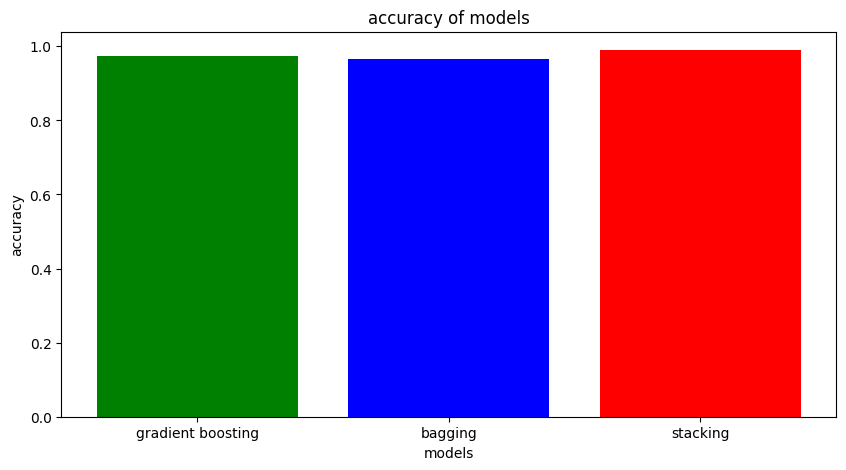

In [51]:
models= ['gradient boosting','bagging','stacking']
colors=['green','blue','red']
accuracy=[accuracy_score(y_test, y_pred_gbc),accuracy_score(y_test, y_pred_bc),accuracy_score(y_test, y_pred_stacking)]
plt.figure(figsize=(10,5))
plt.bar(models,accuracy,color=colors)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.title('accuracy of models')
plt.show()

Model Comparison

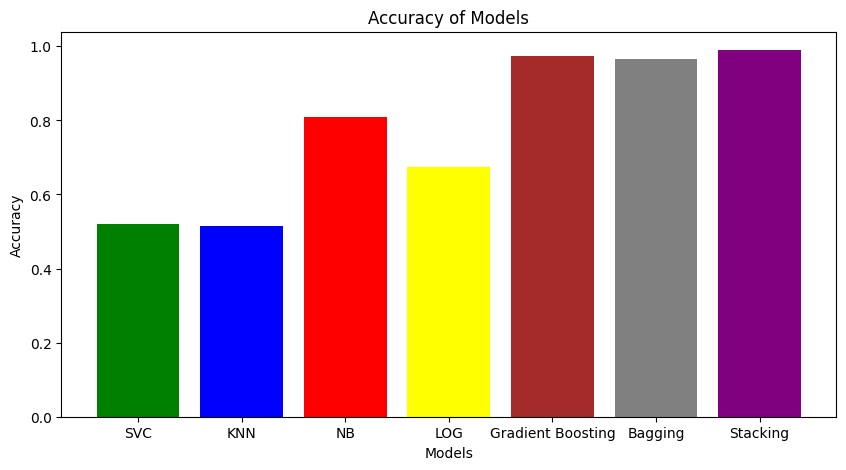

In [52]:
models = ['SVC', 'KNN', 'NB', 'LOG', 'Gradient Boosting', 'Bagging', 'Stacking']
colors = ['green', 'blue', 'red', 'yellow', 'brown', 'grey', 'purple']
accuracy=[
    accuracy_score(y_test, SVC_pred),
    accuracy_score(y_test, KNN_pred),
    accuracy_score(y_test, NB_pred),
    accuracy_score(y_test, LOG_pred),
    accuracy_score(y_test, y_pred_gbc),
    accuracy_score(y_test, y_pred_bc),
    accuracy_score(y_test, y_pred_stacking)
]
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.show()

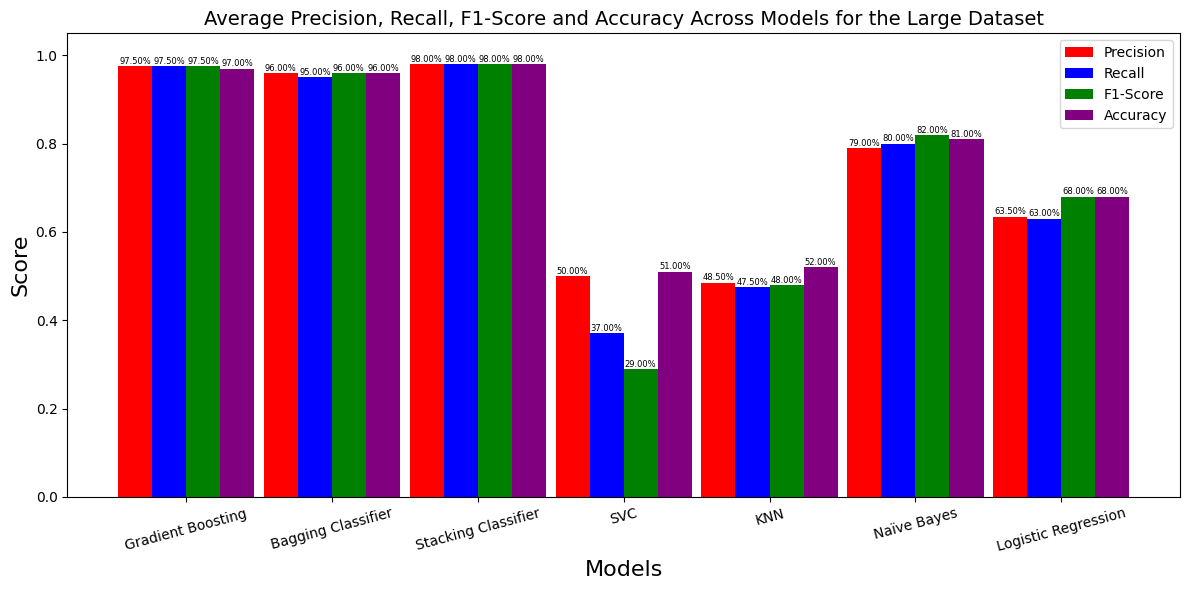

In [53]:
# Model names
models = ["Gradient Boosting", "Bagging Classifier", "Stacking Classifier",
          "SVC", "KNN", "Naïve Bayes", "Logistic Regression"]

# Metric values per model (for 2 classes each)
gradient_boosting = {
    "precision": [0.97, 0.98],
    "recall": [0.98, 0.97],
    "f1-score": [0.98, 0.97],
    'accuracy': [0.97]
}

bagging_classifier = {
    "precision": [0.96, 0.96],
    "recall": [0.94, 0.96],
    "f1-score": [0.95, 0.97],
    'accuracy': [0.96]
}

stacking_classifier = {
    "precision": [0.98, 0.98],
    "recall": [0.98, 0.98],
    "f1-score": [0.98, 0.98],
    'accuracy': [0.98]
}

svc = {
    "precision": [0.00, 1.00],
    "recall": [0.00, 0.74],
    "f1-score": [0.00, 0.58],
    'accuracy': [0.51]
}

knn = {
    "precision": [0.29, 0.68],
    "recall": [0.33, 0.62],
    "f1-score": [0.39, 0.57],
    'accuracy': [0.52]
}

naive_bayes = {
    "precision": [0.67, 0.91],
    "recall": [0.75, 0.85],
    "f1-score": [0.84, 0.80],
    'accuracy': [0.81]
}

log_reg = {
    "precision": [0.40, 0.87],
    "recall": [0.50, 0.76],
    "f1-score": [0.69, 0.67],
    'accuracy': [0.68]
}

# Compute averages
precision_scores = [
    np.mean(gradient_boosting["precision"]), np.mean(bagging_classifier["precision"]),
    np.mean(stacking_classifier["precision"]), np.mean(svc["precision"]),
    np.mean(knn["precision"]), np.mean(naive_bayes["precision"]), np.mean(log_reg["precision"])
]

recall_scores = [
    np.mean(gradient_boosting["recall"]), np.mean(bagging_classifier["recall"]),
    np.mean(stacking_classifier["recall"]), np.mean(svc["recall"]),
    np.mean(knn["recall"]), np.mean(naive_bayes["recall"]), np.mean(log_reg["recall"])
]

f1_scores = [
    np.mean(gradient_boosting["f1-score"]), np.mean(bagging_classifier["f1-score"]),
    np.mean(stacking_classifier["f1-score"]), np.mean(svc["f1-score"]),
    np.mean(knn["f1-score"]), np.mean(naive_bayes["f1-score"]), np.mean(log_reg["f1-score"])
]


accuracy_scores = [
    gradient_boosting['accuracy'][0], bagging_classifier['accuracy'][0],
    stacking_classifier['accuracy'][0], svc['accuracy'][0],
    knn['accuracy'][0], naive_bayes['accuracy'][0], log_reg['accuracy'][0]
]

# Plotting
x = np.arange(len(models)) * 1.5  # Add spacing between groups
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - 1.5*width, precision_scores, width, label="Precision", color="red")
bars2 = ax.bar(x - 0.5*width, recall_scores, width, label="Recall", color="blue")
bars3 = ax.bar(x + 0.5*width, f1_scores, width, label="F1-Score", color="green")
bars4 = ax.bar(x + 1.5*width, accuracy_scores, width, label="Accuracy", color="purple")

# Add values on top of bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.0005, f"{height:.2%}", ha='center', va='bottom', fontsize=6)

# Labels and formatting
ax.set_xlabel("Models", fontsize=16)
ax.set_ylabel("Score", fontsize=16)
ax.set_title("Average Precision, Recall, F1-Score and Accuracy Across Models for the Large Dataset", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10, rotation=15)
ax.set_ylim(0, 1.05)
ax.legend()

plt.tight_layout()
plt.show()